In [3]:
import Pkg
Pkg.instantiate()

   Installed CEnum ─────────── v0.4.2
   Installed IntelOpenMP_jll ─ v2023.2.0+0


   Installed Compat ────────── v4.10.0
   Installed FillArrays ────── v1.7.0
   Installed SciMLBase ─────── v2.9.0


   Installed Bijectors ─────── v0.13.7


   Installed PrettyTables ──── v2.3.0


   Installed LLVM ──────────── v6.4.0


Precompiling project...


  ✓ CEnum


  ✓ Compat


  ✓ IntelOpenMP_jll


  ✓ FillArrays


  ✓ Compat → CompatLinearAlgebraExt


  ✓ MKL_jll


  ✓ FillArrays → FillArraysSparseArraysExt


  ✓ BangBang


  ✓ FillArrays → FillArraysStatisticsExt


  ✓ ChainRulesCore


  ✓ DataStructures


  ✓ ChainRulesCore → ChainRulesCoreSparseArraysExt


  ✓ SortingAlgorithms


  ✓ BangBang → BangBangChainRulesCoreExt
  ✓ NamedArrays


  ✓ QuadGK


  ✓ Optimisers


  ✓ AbstractFFTs → AbstractFFTsChainRulesCoreExt


  ✓ LogExpFunctions → LogExpFunctionsChainRulesCoreExt


  ✓ ZygoteRules


  ✓ LLVM


  ✓ BangBang → BangBangStaticArraysExt


  ✓ Interpolations


  ✓ BangBang → BangBangStructArraysExt


  ✓ Roots


  ✓ UnsafeAtomicsLLVM


  ✓ StatsBase
  ✓ MicroCollections


  ✓ SpecialFunctions → SpecialFunctionsChainRulesCoreExt


  ✓ ChainRules


  ✓ Transducers


  ✓ StatsFuns → StatsFunsChainRulesCoreExt


  ✓ KernelAbstractions


  ✓ AbstractMCMC


  ✓ Roots → RootsForwardDiffExt


  ✓ AbstractPPL


  ✓ Distributions


  ✓ NNlib


  ✓ Distributions → DistributionsTestExt


  ✓ Distributions → DistributionsDensityInterfaceExt


  ✓ QuasiMonteCarlo → QuasiMonteCarloDistributionsExt


  ✓ Distributions → DistributionsChainRulesCoreExt


  ✓ Tracker


  ✓ MCMCDiagnosticTools


  ✓ AdvancedMH


  ✓ AdvancedPS


  ✓ KernelDensity


  ✓ ArrayInterface → ArrayInterfaceTrackerExt
  ✓ Tracker → TrackerPDMatsExt


  ✓ LogDensityProblemsAD → LogDensityProblemsADTrackerExt


  ✓ PrettyTables


  ✓ EllipticalSliceSampling


  ✓ RecursiveArrayTools → RecursiveArrayToolsTrackerExt


  ✓ AdvancedHMC


  ✓ Bijectors


  ✓ DistributionsAD


  ✓ MCMCChains


  ✓ SciMLBase


  ✓ SciMLBase → SciMLBaseChainRulesCoreExt


  ✓ DistributionsAD → DistributionsADTrackerExt
  ✓ AdvancedHMC → AdvancedHMCMCMCChainsExt
  ✓ AdvancedMH → AdvancedMHMCMCChainsExt


  ✓ Bijectors → BijectorsTrackerExt


  ✓ DistributionsAD → DistributionsADForwardDiffExt


  ✓ AdvancedMH → AdvancedMHForwardDiffExt


  ✓ Bijectors → BijectorsForwardDiffExt


  ✓ AdvancedMH → AdvancedMHStructArraysExt


  ✓ Bijectors → BijectorsDistributionsADExt


  ✓ AdvancedVI


  ✓ DynamicPPL


  ✓ DynamicPPL → DynamicPPLMCMCChainsExt


  ✓ Turing


  ✓ ExponentialAnalysis
  73 dependencies successfully precompiled in 78 seconds. 140 already precompiled.
  1 dependency had output during precompilation:
┌ AbstractFFTsChainRulesCoreExt [07c0d231-1838-56d6-9ec8-835e5b9b958e]
│  ┌ Warning: The call to compilecache failed to create a usable precompiled cache file for ChainRulesCoreSparseArraysExt [b93a7035-081d-5d9c-b45c-e3eb3a79b0f8]
│  │   exception = ArgumentError: Invalid checksum in cache file /Users/kimseok/.julia/compiled/v1.9/ChainRulesCoreSparseArraysExt/QNMPN_Qrztq.dylib.
│  └ @ Base loading.jl:1818
│  ┌ Error: Error during loading of extension ChainRulesCoreSparseArraysExt of ChainRulesCore, use `Base.retry_load_extensions()` to retry.
│  │   exception =
│  │    1-element ExceptionStack:
│  │    Declaring __precompile__(false) is not allowed in files that are being precompiled.
│  │    Stacktrace:
│  │      [1] _require(pkg::Base.PkgId, env::Nothing)
│  │        @ Base ./loading.jl:1825
│  │      [2] _require_prelocked(uuidk

In [4]:
using Distributions,CSV,DataFrames,StatsPlots,Turing
using ExponentialAnalysis
default(size=(700,300))

┌ Warning: backend `GR` is not installed.
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/backends.jl:43


# テレビCMの露出をPPLで表現する
- GRPは接触人数である。ある母集団から一定割合の人を選んで戻す、という試行を繰り返すことと等しい。
- したがって視聴率分の試行を連続して行う幾何分布であるといえる。
- しかし幾何分布の場合、pとして与えられるパラメータはひとつの定数である。これに対してGRP投下はpが連続して変化する。
- まずはこのようにpが変化する（一本ずつの視聴率が異なる）GRP投下をPPLで表現する方法を明らかにする

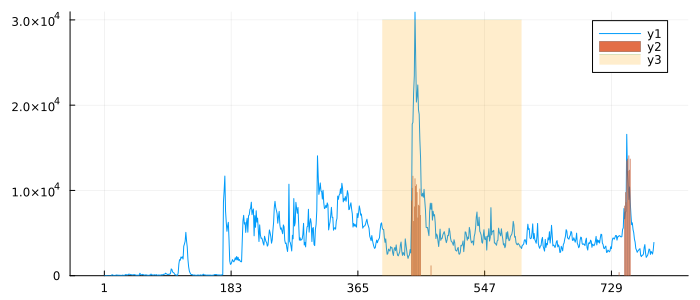

In [5]:
cc_df = CSV.read("data/CCHANNEL_DL_TV.csv", DataFrame)
@df cc_df[:,:] plot(:TTL, xticks=1:182:364*3)
@df cc_df[:,:] bar!(:GRP .* 1e2, lw=0)
plot!(400:600, x->3e4, fill=(0, 0.2, :orange), lw=0)

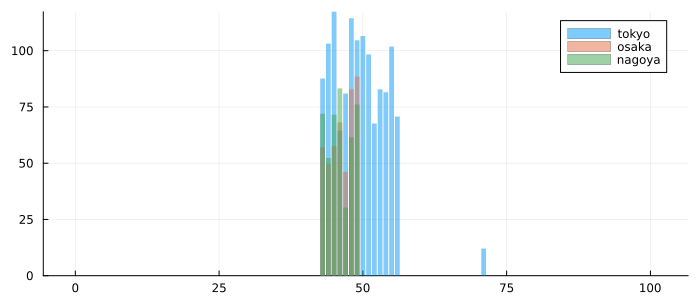

In [4]:
cc3 = CSV.read("data/CCHANNEL_DL_3AREA_400-500.csv", DataFrame)
@df cc3 bar([:GRPT, :GRPO, :GRPN] ,lw=0, alpha=0.5)
ccdl= cc3[:,:TTL] ;
mccgrp=  cc3[:,[:GRPT, :GRPO, :GRPN]] |> Matrix
ms = [43_000_000 , 20_000_000, 10_000_000];
bar(mccgrp, lw=0, alpha=0.5, label=["tokyo" "osaka" "nagoya"])

In [5]:
mod = expmodel(ccdl, mccgrp, ms)

DynamicPPL.Model{typeof(ExponentialAnalysis.expdecompose), (:dl, :grp, :ms), (:K,), (), Tuple{Vector{Int64}, Matrix{Float64}, Vector{Int64}}, Tuple{Int64}, DynamicPPL.DefaultContext}(ExponentialAnalysis.expdecompose, (dl = [5594, 5414, 5415, 4457, 3914, 4320, 3208, 2507, 2600, 3120  …  4775, 4229, 3877, 4180, 4731, 4693, 5562, 5186, 4419, 4039], grp = [0.0 0.0 0.0; 0.0 0.0 0.0; … ; 0.0 0.0 0.0; 0.0 0.0 0.0], ms = [43000000, 20000000, 10000000]), (K = 2,), DynamicPPL.DefaultContext())

In [6]:
ps, chain = analysis(mod)

┌ Info: Found initial step size
│   ϵ = 2.3283064365386964e-11
└ @ Turing.Inference C:\Users\kimse\.julia\packages\Turing\UCuzt\src\mcmc\hmc.jl:192


((ys = [1.741457147232772, 39.5079089235459], w = [0.5283606137024478, 0.4716393862975521], r = [0.00017970756095519539, 5.85316845553553e-6], s = 593.3111445620494), MCMC chain (2000×19×1 Array{Float64, 3}))

In [7]:
cc_eff, lb = describe_effect(ccdl, mccgrp, ms, ps)

([1874.7433579790043 0.0 0.0; 1874.7433579790043 0.0 0.0; … ; 1874.7433579790043 7.273683630659031e-5 1103.432099779255; 1874.7433579790043 4.096082769142924e-5 1075.853204545488;;; 871.9736548739554 0.0 0.0; 871.9736548739554 0.0 0.0; … ; 871.9736548739554 1.5799048298285194e-9 163.76694539785825; 871.9736548739554 8.898986490403928e-10 159.67379691071037;;; 435.9868274369777 0.0 0.0; 435.9868274369777 0.0 0.0; … ; 435.9868274369777 6.762932944631687e-10 80.62479364404622; 435.9868274369777 3.8093147745473705e-10 78.60967849776917], ["recog_base" "short_grp_effect" "long_grp_effect"])

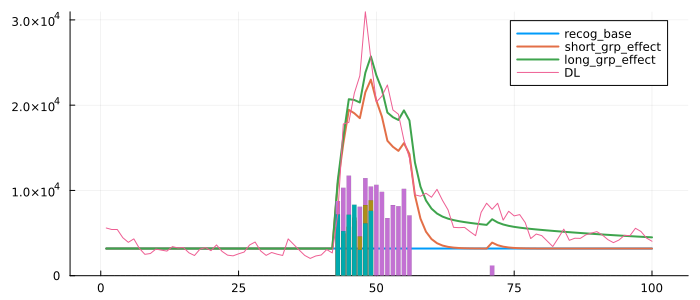

In [8]:
cc_eff_mat = sum(cc_eff,dims=3) |> t-> accumulate(+, t, dims=2) |> t->reshape(t, :, 3) 
plot(cc_eff_mat , label=lb,lw=2)
bar!(mccgrp .* 100, lw=0,label="")
plot!(ccdl,label="DL")

mdist = MixtureModel([Exponential(y) for y = ps.ys], ps.w) = MixtureModel{Exponential{Float64}}(K = 2)
components[1] (prior = 0.5284): Exponential{Float64}(θ=1.741457147232772)
components[2] (prior = 0.4716): Exponential{Float64}(θ=39.5079089235459)



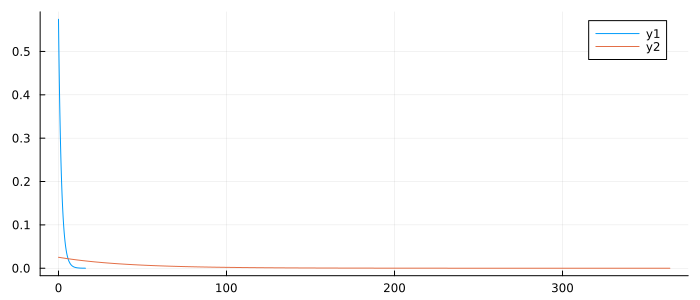

In [9]:
@show mdist = MixtureModel([Exponential(y) for y in ps.ys], ps.w)
plot(mdist)

In [10]:
inference_recognition(ccdl[1:40])

┌ Info: Found initial step size
│   ϵ = 5.960464477539063e-9
└ @ Turing.Inference C:\Users\kimse\.julia\packages\Turing\UCuzt\src\mcmc\hmc.jl:192


(0.09034394739955383, (r = 15.781988854583506, p = 0.00490786385966866, th = 202.75463309357403, recog = 0.09034394739955383, s = 302.26065827874424))

In [11]:
inference_recognition(ccdl[75:100])

┌ Info: Found initial step size
│   ϵ = 1.4901161193847657e-9
└ @ Turing.Inference C:\Users\kimse\.julia\packages\Turing\UCuzt\src\mcmc\hmc.jl:192


(0.20335096098418332, (r = 26.18290888232148, p = 0.005397003930199453, th = 184.28798810102845, recog = 0.20335096098418332, s = 262.9484763566016))

# 別のデータ　DELISH KITCHEN

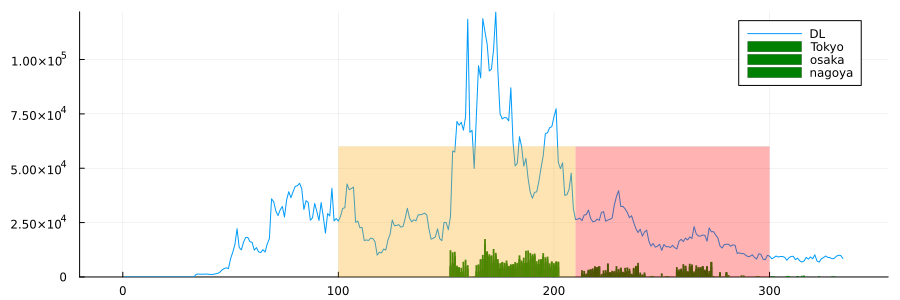

In [12]:
dk =CSV.read("data/Delish_kitchen_dl_tv_ton.csv",DataFrame);
@df dk plot(:TTL,label="DL",size=(900,300))
@df dk bar!([:GRPT, :GRPO, :GRPN] .* 1e2, label=["Tokyo" "osaka" "nagoya"],lw=0, c=:green)
plot!(100:210, x->6e4,fill=(0,0.3, :orange),lw=0,label="")
plot!(210:300, x->6e4,fill=(0,0.3, :red),lw=0,label="")
#plot!(100:150, x->6e4,fill=(0,0.3, :red),lw=0,label="")

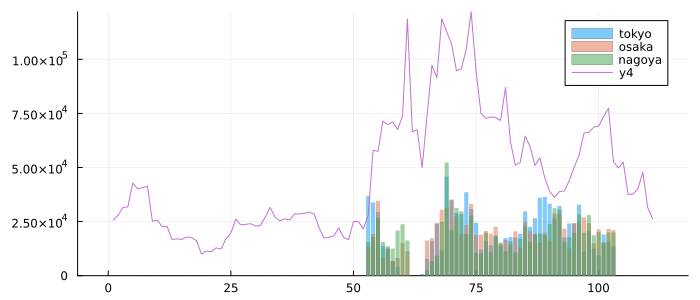

In [13]:
dkdl= dk[100:210,:TTL] ;
mdkgrp=  dk[100:210,[:GRPT, :GRPO, :GRPN]] |> Matrix
ms = [43_000_000 , 20_000_000, 10_000_000];
bar(mdkgrp .* 300, lw=0, alpha=0.5, label=["tokyo" "osaka" "nagoya"])
plot!(dkdl)

In [14]:
model=expmodel(dkdl, mdkgrp, ms)
dkps, dk_chain =analysis(model)

┌ Info: Found initial step size
│   ϵ = 1.8626451492309571e-10
└ @ Turing.Inference C:\Users\kimse\.julia\packages\Turing\UCuzt\src\mcmc\hmc.jl:192


((ys = [1.8755368222871058, 1.8578332665307171], w = [0.503174294370303, 0.4968257056296968], r = [0.0010551480941319133, 8.139834871527759e-6], s = 3384.002226421618), MCMC chain (2000×19×1 Array{Float64, 3}))

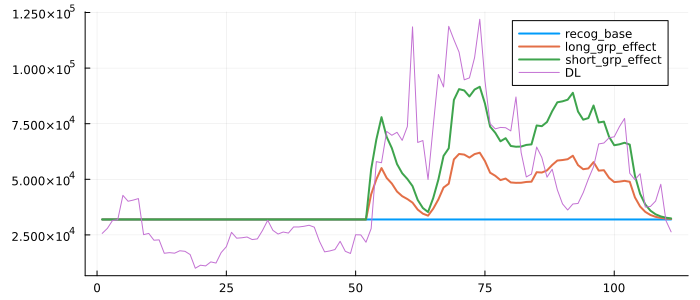

In [15]:
dk_effect, dk_lb = describe_effect(dkdl, mdkgrp, ms, dkps)
dk_eff_mat = sum(dk_effect,dims=3) |> t-> accumulate(+, t, dims=2) |> t->reshape(t, :, 3) 
plot(dk_eff_mat, label=dk_lb,lw=2)
plot!(dkdl, label="DL")
#bar!(mdkgrp .* 100, lw=0,legend=false)

mdist = MixtureModel{Exponential{Float64}}(K = 2)
components[1] (prior = 0.5032): Exponential{Float64}(θ=1.8755368222871058)
components[2] (prior = 0.4968): Exponential{Float64}(θ=1.8578332665307171)



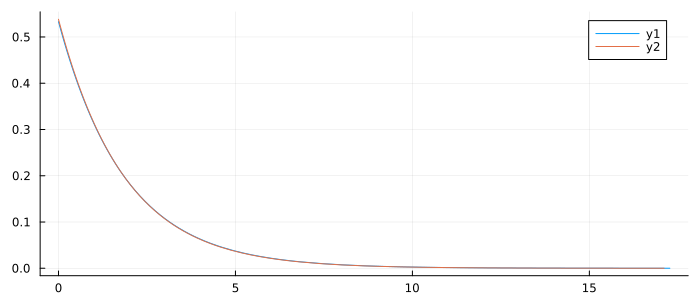

In [16]:
mdist = MixtureModel([Exponential(y) for y in dkps.ys], dkps.w)
@show mdist ;plot(mdist)

In [17]:
ir, _=inference_recognition(dk[100:150, :TTL])
ir2, _=inference_recognition(dk[300:end, :TTL])
ir, ir2

┌ Info: Found initial step size
│   ϵ = 7.450580596923829e-10
└ @ Turing.Inference C:\Users\kimse\.julia\packages\Turing\UCuzt\src\mcmc\hmc.jl:192
┌ Info: Found initial step size
│   ϵ = 9.5367431640625e-8
└ @ Turing.Inference C:\Users\kimse\.julia\packages\Turing\UCuzt\src\mcmc\hmc.jl:192


(0.9100805264134149, 0.6386364790904713)

### Other case; Brave Frontier

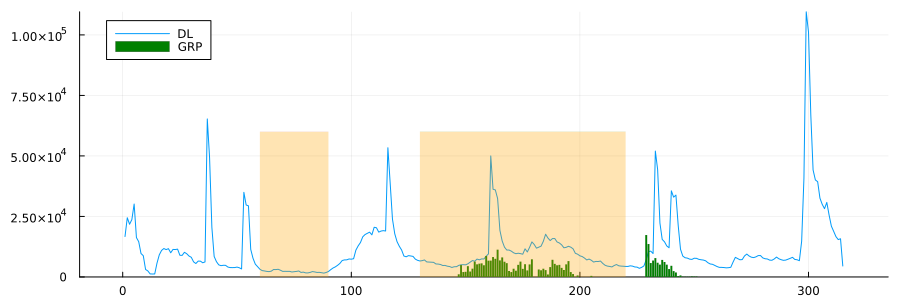

In [18]:
bf = CSV.read("data/BRAFRO_DL_GRP.csv",DataFrame)  
@df bf plot(:TTL,label="DL",size=(900,300))
@df bf bar!(:GRP .* 1e2, label="GRP",lw=0, c=:green)
plot!(130:220, x->6e4,fill=(0,0.3, :orange),lw=0,label="")
plot!(60:90, x->6e4,fill=(0,0.3, :orange),lw=0,label="")

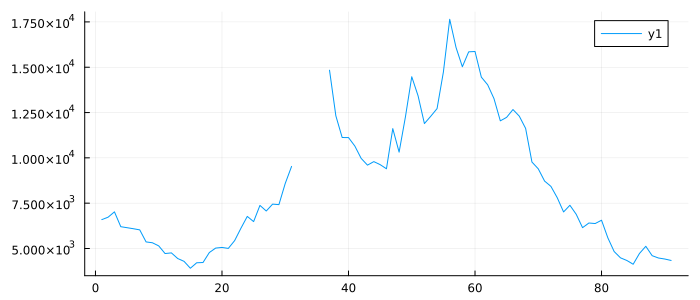

In [19]:
bfdl =bf[130:220,:TTL] |> t->[i in 32:36 ? missing : t[i] for i =1:length(t)]
bfgrp =bf[130:220, :GRP];
bfmgrp = bf[130:220, [:GRP_TOKYO, :GRP_OSAKA, :GRP_NAGOYA]] |> Matrix ;

plot(bfdl)

In [20]:
model=expmodel(bfdl, bfmgrp, ms)
bfps, bf_chain =analysis(model)

┌ Info: Found initial step size
│   ϵ = 2.3283064365386964e-11
└ @ Turing.Inference C:\Users\kimse\.julia\packages\Turing\UCuzt\src\mcmc\hmc.jl:192


((ys = [15.019726571506908, 0.7587335893305385], w = [0.8796996652126179, 0.12030033478738202], r = [0.00038631309855833364, 2.491231399786851e-6], s = 630.7975877302556), MCMC chain (2000×19×1 Array{Float64, 3}))

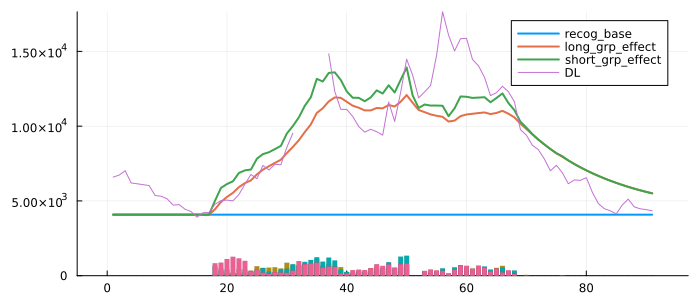

In [21]:
bf_effect, bf_lb = describe_effect(bfdl, bfmgrp, ms, bfps)
bf_effect_mat = sum(bf_effect, dims=3) |> t-> accumulate(+, t, dims=2) |> t->reshape(t, :, 3) 
plot(bf_effect_mat, label=bf_lb,lw=2)
plot!(bfdl, label="DL")
bar!(bfmgrp .* 1e1, lw=0, label="")

mdist = MixtureModel{Exponential{Float64}}(K = 2)
components[1] (prior = 0.8797): Exponential{Float64}(θ=1.8755368222871058)
components[2] (prior = 0.1203): Exponential{Float64}(θ=1.8578332665307171)



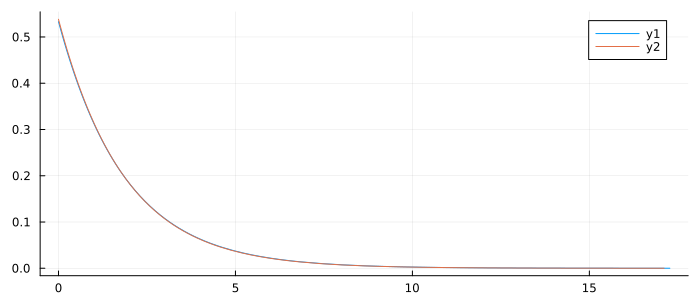

In [22]:
mdist = MixtureModel([Exponential(y) for y in dkps.ys], bfps.w)
@show mdist ;plot(mdist)

## Other case; KURASHIRU

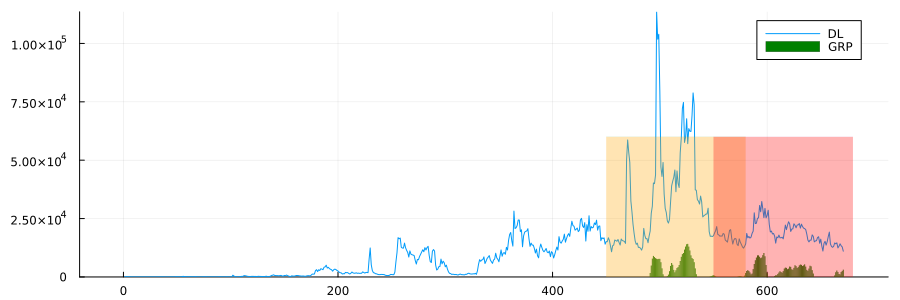

In [6]:
kr = CSV.read("data/KURASHIRU_GRP_DL.csv",DataFrame)  
@df kr plot(:TTL,label="DL",size=(900,300))
@df kr bar!(:GRP .* 1e2, label="GRP",lw=0, c=:green)
plot!(450:580, x->6e4,fill=(0,0.3, :orange),lw=0,label="")
plot!(550:680, x->6e4,fill=(0,0.3, :red),lw=0,label="")
#plot!(400:440, x->6e4,fill=(0,0.3, :red),lw=0,label="")

In [7]:
krdl = kr[450:580,:TTL] |> t->[i in 20:25 || i in 48:51 ? missing : t[i] for i =1:length(t)];
krgrp = kr[450:580,:GRP] ;

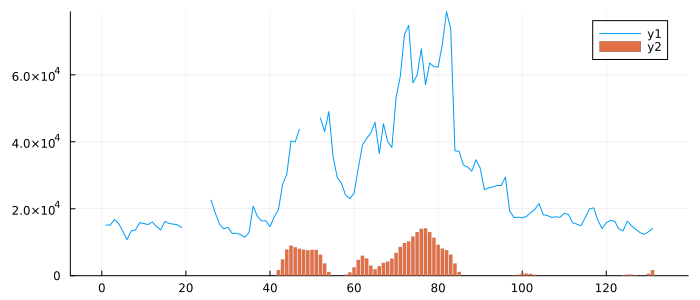

In [9]:
plot(krdl)
bar!(krgrp .* 100, lw=0)

In [5]:
model=expmodel(krdl, krgrp, 120_000_000)
krps, kr_chain =analysis(model)

┌ Info: Found initial step size
│   ϵ = 2.3283064365386964e-11
└ @ Turing.Inference C:\Users\kimse\.julia\packages\Turing\UCuzt\src\mcmc\hmc.jl:192


((ys = [8.680629431634753, 0.25171382209563636], w = [0.6560024926827038, 0.3439975073172963], r = [0.00031906946149190096, 4.732198433053957e-6], s = 1496.1108491761913), MCMC chain (2000×19×1 Array{Float64, 3}))

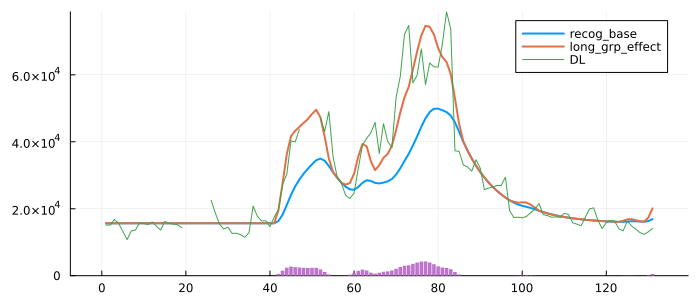

In [18]:
kr_effect, kr_lb = describe_effect(krdl, krgrp, 120_000_000, krps)
kr_effect_mat = accumulate(+, kr_effect, dims=2) |> t->t[:, 2:3]
plot(kr_effect_mat, label=kr_lb,lw=2)
plot!(krdl, label="DL")
bar!(krgrp .* 3e1, lw=0, label="")

mdist = MixtureModel([Exponential(y) for y = krps.ys], krps.w) = MixtureModel{Exponential{Float64}}(K = 2)
components[1] (prior = 0.6560): Exponential{Float64}(θ=8.680629431634753)
components[2] (prior = 0.3440): Exponential{Float64}(θ=0.25171382209563636)



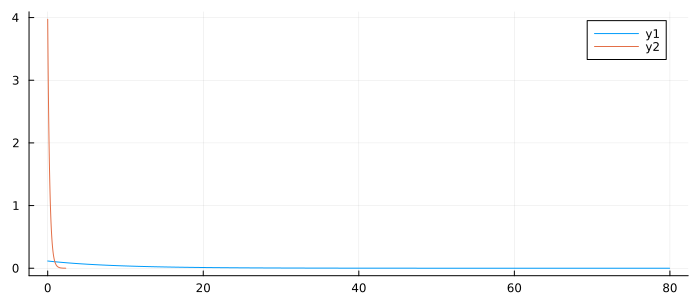

In [20]:
@show mdist = MixtureModel([Exponential(y) for y in krps.ys], krps.w)
plot(mdist)

In [22]:
@show ir1,_=inference_recognition(krdl[1:40])
@show ir2,_=inference_recognition(krdl[100:end])


┌ Info: Found initial step size
│   ϵ = 7.450580596923829e-10
└ @ Turing.Inference C:\Users\kimse\.julia\packages\Turing\UCuzt\src\mcmc\hmc.jl:192


(ir1, _) = inference_recognition(krdl[1:40]) = (0.9513247524533489, (r = 25.75448520666445, p = 0.0017255500006337452, th = 578.5253685101727, recog = 0.9513247524533489, s = 562.4342680342692))


┌ Info: Found initial step size
│   ϵ = 1.1920928955078126e-8
└ @ Turing.Inference C:\Users\kimse\.julia\packages\Turing\UCuzt\src\mcmc\hmc.jl:192


(ir2, _) = inference_recognition(krdl[100:end]) = (0.9433673466446717, (r = 23.881223274031715, p = 0.001471607030537001, th = 678.5292352164777, recog = 0.9433673466446717, s = 544.9860633756625))


(0.9433673466446717, (r = 23.881223274031715, p = 0.001471607030537001, th = 678.5292352164777, recog = 0.9433673466446717, s = 544.9860633756625))

# Kurachiru 後半

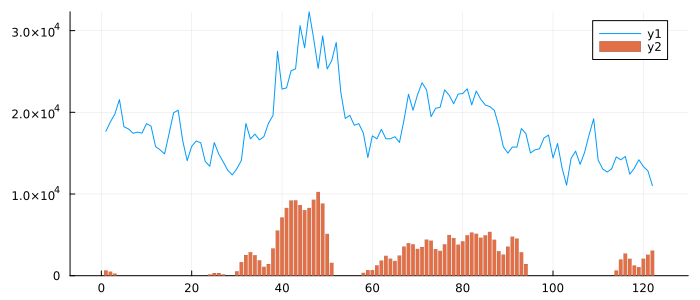

In [11]:
krdl2 = kr[550:end,:TTL] 
krgrp2 = kr[550:end,:GRP] ;
plot(krdl2)
bar!(krgrp2 .*100, lw=0)

In [31]:
model=expmodel(krdl2, krgrp2, 120_000_000)
kr2ps, kr_chain =analysis(model)

┌ Info: Found initial step size
│   ϵ = 1.8626451492309571e-10
└ @ Turing.Inference C:\Users\kimse\.julia\packages\Turing\UCuzt\src\mcmc\hmc.jl:192


((ys = [3.212067728424313, 8.498206651809296], w = [0.9539706876416478, 0.04602931235835227], r = [0.0004728011257920669, 1.2543164306790774e-6], s = 905.0542687254231), MCMC chain (2000×19×1 Array{Float64, 3}))

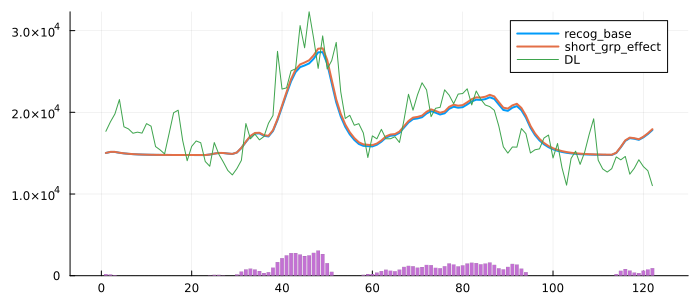

In [34]:
kr2_effect, kr2_lb = describe_effect(krdl2, krgrp2, 120_000_000, kr2ps)
kr2_effect_mat = accumulate(+, kr2_effect, dims=2) |> t->t[:, 2:3]
plot(kr2_effect_mat, label=kr2_lb,lw=2)
plot!(krdl2, label="DL")
bar!(krgrp2 .* 3e1, lw=0, label="")

mdist = MixtureModel([Exponential(y) for y = kr2ps.ys], kr2ps.w) = MixtureModel{Exponential{Float64}}(K = 2)
components[1] (prior = 0.9540): Exponential{Float64}(θ=3.212067728424313)
components[2] (prior = 0.0460): Exponential{Float64}(θ=8.498206651809296)



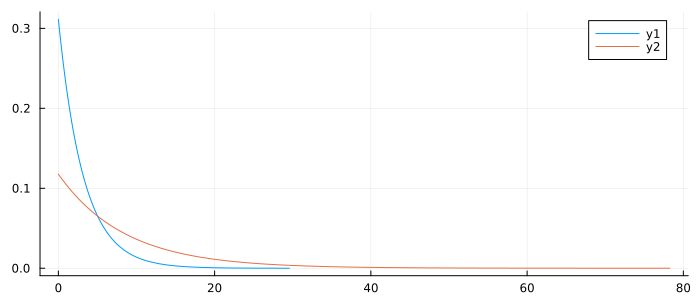

In [36]:
@show mdist = MixtureModel([Exponential(y) for y in kr2ps.ys], kr2ps.w)
plot(mdist)